# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_excel('Health Monitor Dataset.xlsx')
df.head()

,Dehydration,Medicine Overdose,Acidious,Cold,Cough,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Type,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance,Dehydration.1
0,True,True,True,False,True,1,1,0,1,4,98,194,86,104,76,37,0.973243,2,Chronic,1
1,False,True,True,True,True,1,1,1,1,4,98,143,175,104,65,21,0.920217,11,Chronic,0
2,True,False,False,False,False,0,0,0,0,1,99,76,64,100,68,12,0.998053,8,Mild,1
3,False,True,True,True,True,1,1,1,1,4,97,115,161,96,74,7,0.970524,5,Chronic,0
4,True,True,False,True,True,1,0,1,1,4,98,65,94,103,74,6,0.957973,8,Chronic,1


In [3]:
df.isnull().sum()

Dehydration                     0
Medicine Overdose               0
Acidious                        0
Cold                            0
Cough                           0
Medicine Overdose.1             0
Acidious.1                      0
Cold .1                         0
Cough.1                         0
Type                            0
Temperature                     0
Heart Rate                      0
Pulse                           0
BPSYS                           0
BPDIA                           0
Respiratory Rate                0
Oxygen Saturation               0
PH                              0
Causes Respiratory Imbalance    0
Dehydration.1                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dehydration                   4286 non-null   bool   
 1   Medicine Overdose             4286 non-null   bool   
 2   Acidious                      4286 non-null   bool   
 3   Cold                          4286 non-null   bool   
 4   Cough                         4286 non-null   bool   
 5   Medicine Overdose.1           4286 non-null   int64  
 6   Acidious.1                    4286 non-null   int64  
 7   Cold .1                       4286 non-null   int64  
 8   Cough.1                       4286 non-null   int64  
 9   Type                          4286 non-null   int64  
 10  Temperature                   4286 non-null   int64  
 11  Heart Rate                    4286 non-null   int64  
 12  Pulse                         4286 non-null   int64  
 13  BPS

In [5]:
### Here we can see that we have dublicate columns so we drop the dublicate columns here
df = df.drop(['Dehydration','Medicine Overdose','Acidious','Cold ','Cough','Type'],axis='columns')

In [6]:
df.columns

Index(['Medicine Overdose.1', 'Acidious.1', 'Cold .1', 'Cough.1',
       'Temperature', 'Heart Rate', 'Pulse', 'BPSYS', 'BPDIA',
       'Respiratory Rate', 'Oxygen Saturation', 'PH',
       'Causes Respiratory Imbalance', 'Dehydration.1'],
      dtype='object')

In [7]:
### Here first we convert our labe to numbers
## Classes name
labels = ['Chronic','Severe','Mild','Normal']

df['Causes Respiratory Imbalance'].replace({'Normal':0,'Mild':1,'Severe':2,'Chronic':3},inplace=True)

In [8]:
df.sample(5)

,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance,Dehydration.1
2138,1,1,1,1,106,91,161,99,99,17,0.906300,9,3,0
2763,1,1,0,0,104,61,123,103,81,44,0.960379,11,2,0
4102,1,0,1,1,102,177,135,95,78,48,0.972360,11,3,1
2749,0,1,0,1,104,198,189,100,63,31,0.912873,11,3,1
3610,1,0,0,0,99,101,183,100,44,37,0.945608,8,2,1


In [9]:
df.shape

(4286, 14)

## Visualization

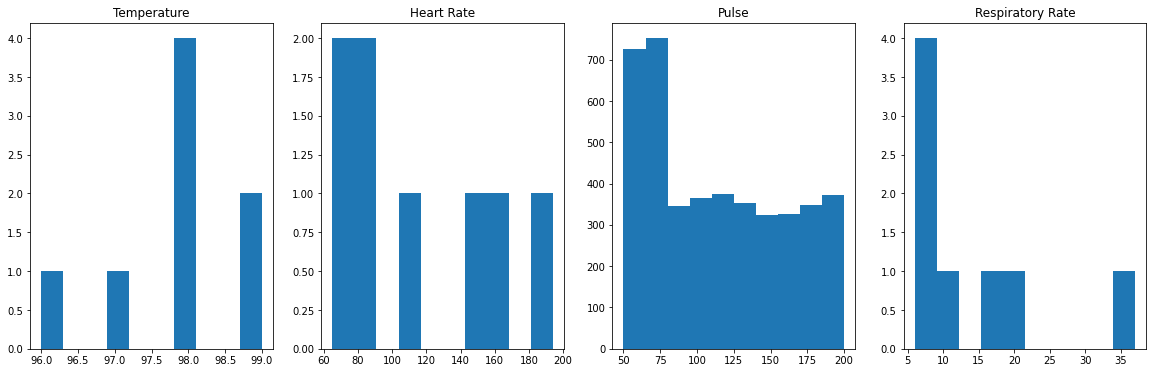

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
ax1.hist(df[:8].Temperature)
ax1.set_title("Temperature")

ax2.hist(df['Heart Rate'][:8])
ax2.set_title("Heart Rate")

ax3.hist(df.Pulse)
ax3.set_title("Pulse")

ax4.hist(df['Respiratory Rate'][:8])
ax4.set_title("Respiratory Rate")

plt.show()

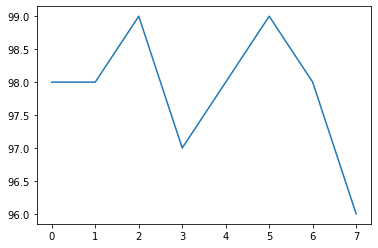

In [11]:
plt.plot(df['Temperature'][:8])

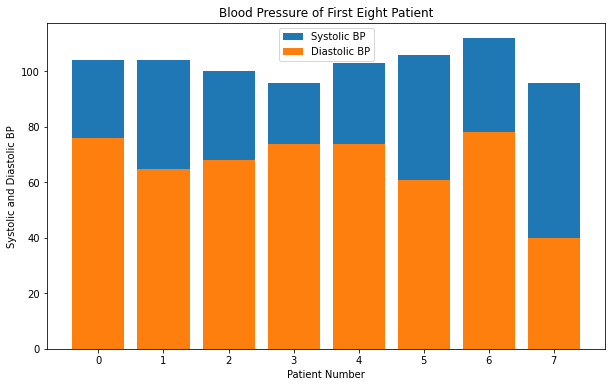

In [12]:
#### Heart Rate Graph
plt.figure(figsize=(10,6))
x = [i for i in range(8)]
plt.bar(x,df['BPSYS'][:8],label = 'Systolic BP')
plt.bar(x,df['BPDIA'][:8],label = 'Diastolic BP')
plt.title("Blood Pressure of First Eight Patient")
plt.xlabel("Patient Number")
plt.ylabel("Systolic and Diastolic BP")
plt.legend()
plt.show()

<Figure size 7200x4320 with 0 Axes>

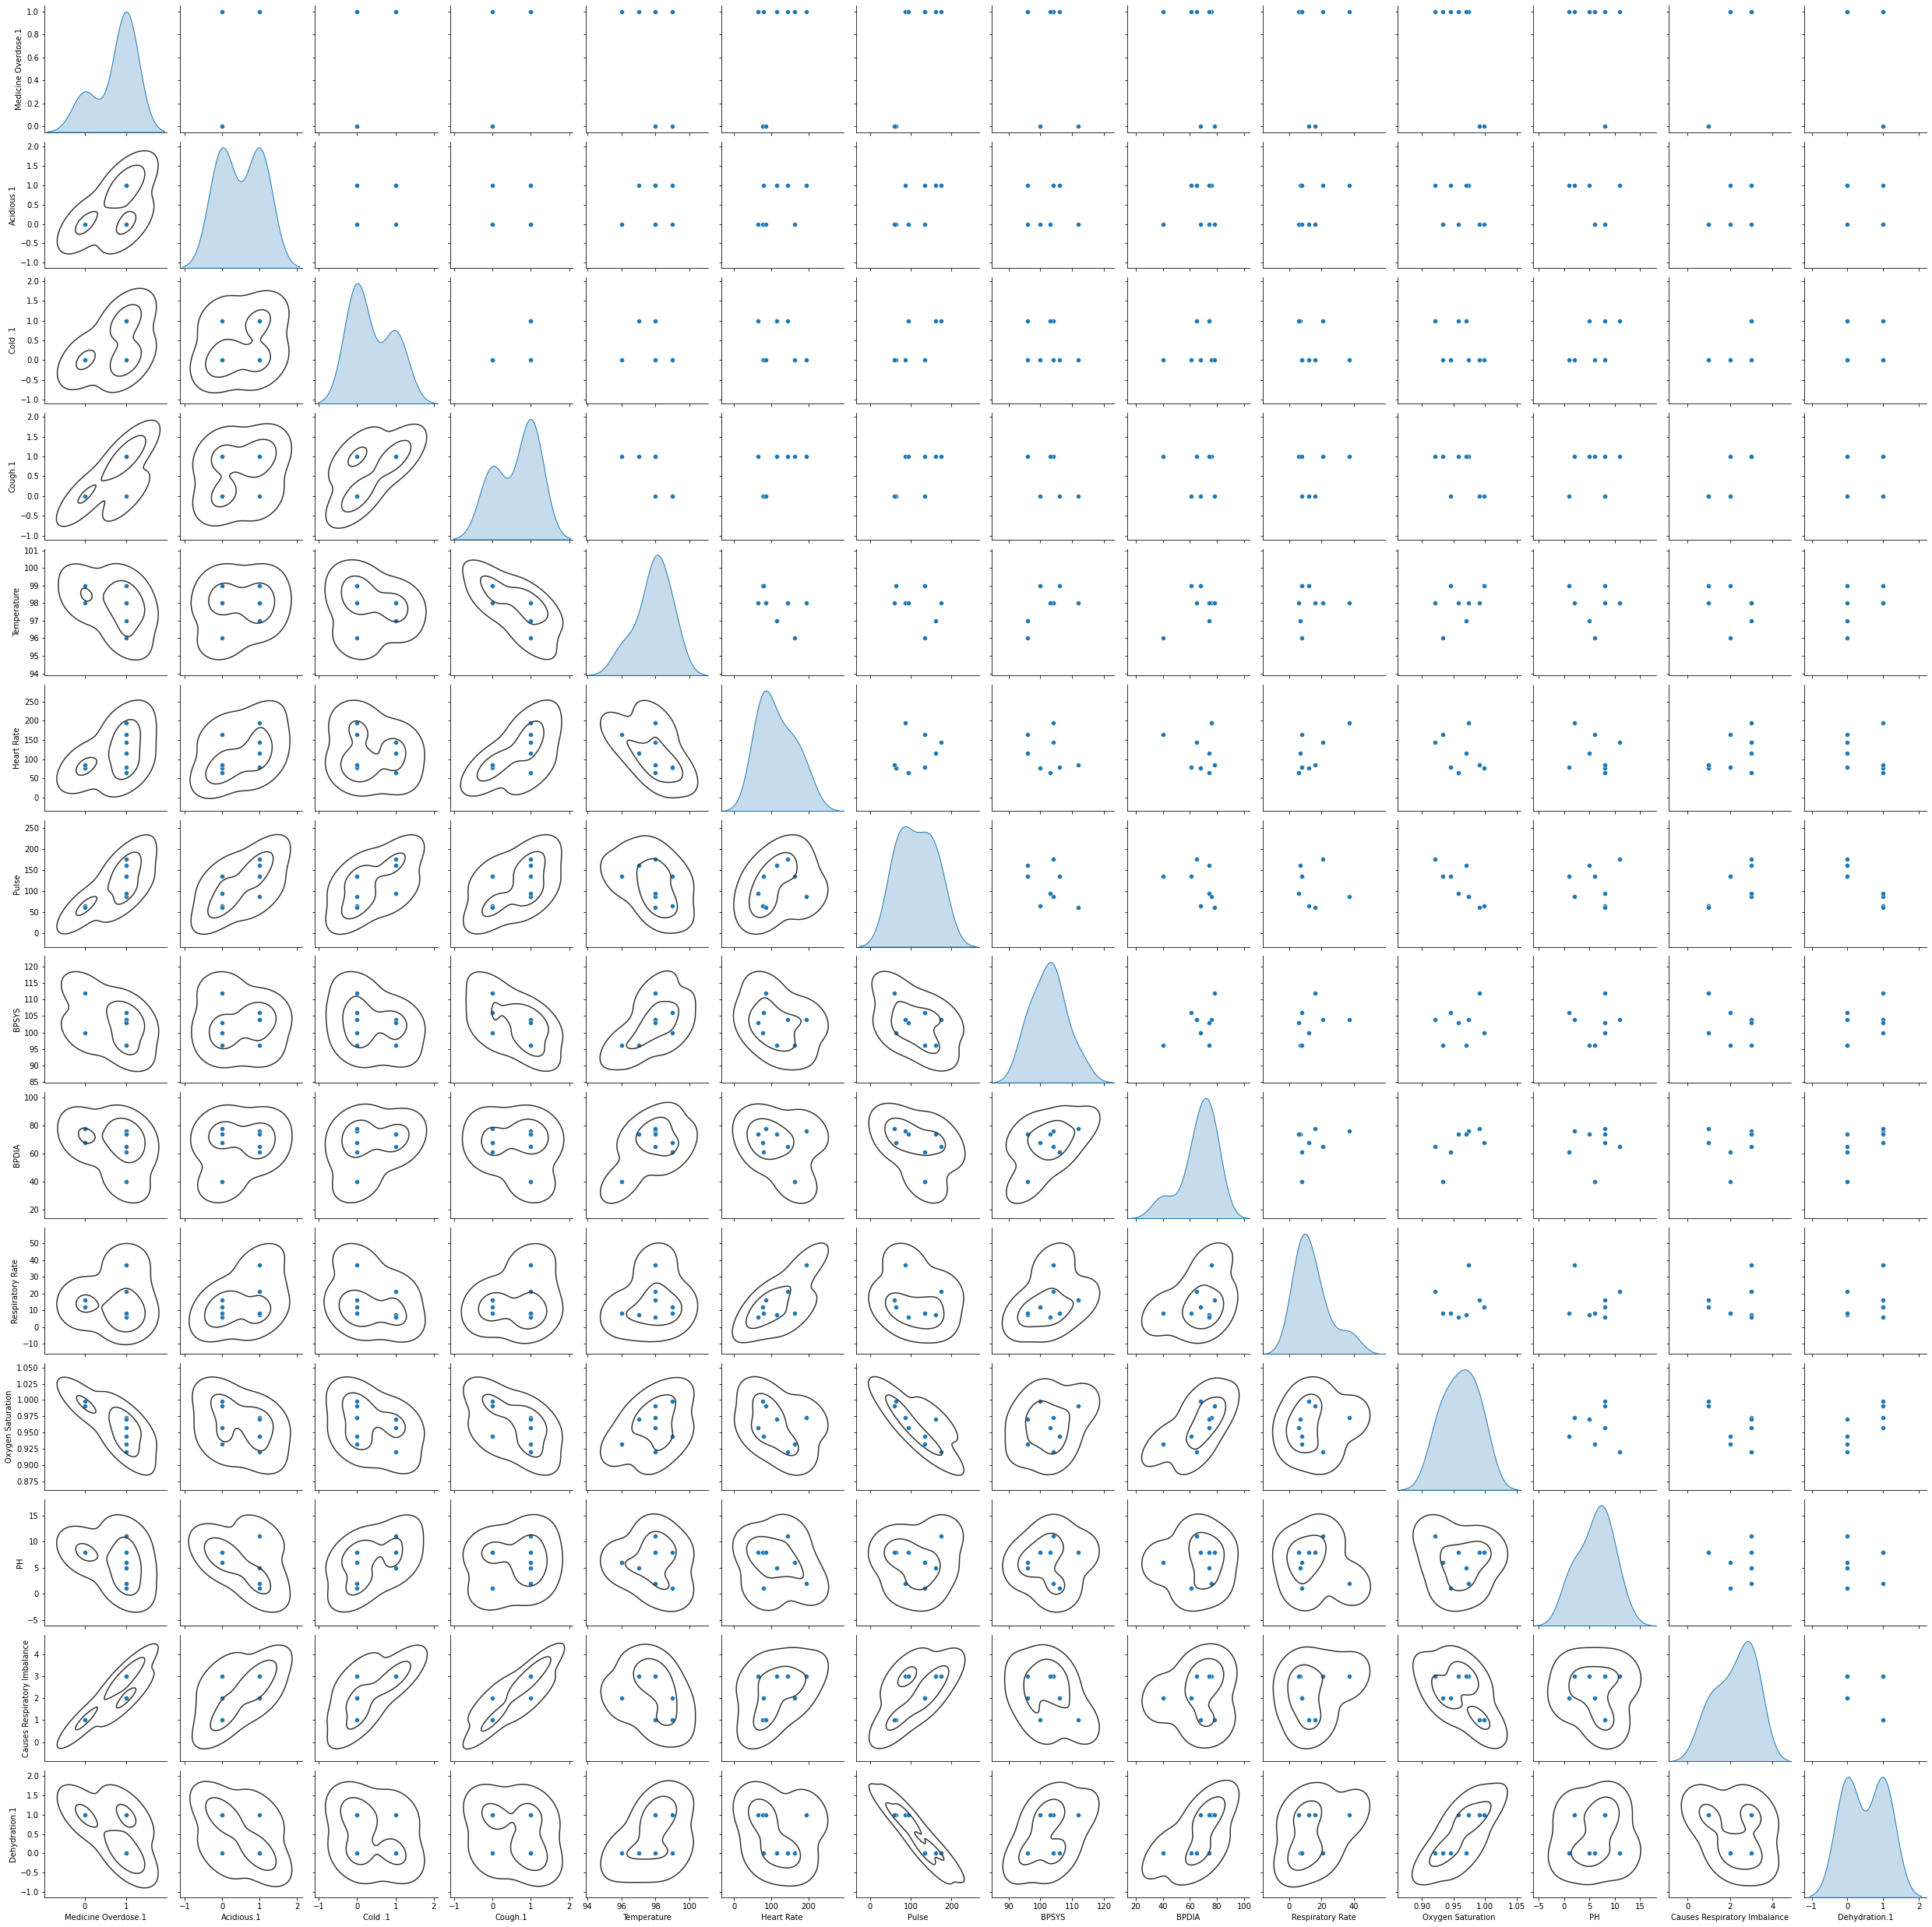

In [13]:
plt.figure(figsize=(100,60))
graph = sns.pairplot(df[:8], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

## Correlation Metrix

In [14]:
df.corr()

,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance,Dehydration.1
Medicine Overdose.1,1.000000,0.015719,0.012321,-0.005622,0.083260,0.103227,0.173097,-0.106421,0.027834,0.133845,-0.222080,-0.038400,0.406135,-0.005263
Acidious.1,0.015719,1.000000,0.014043,0.003844,0.093986,0.113952,0.161236,-0.100106,-0.009186,0.185923,-0.233335,-0.003310,0.418238,-0.003570
Cold .1,0.012321,0.014043,1.000000,0.022003,0.092781,0.186183,0.185385,-0.107973,-0.005601,0.148694,-0.242631,-0.009533,0.419447,-0.014557
Cough.1,-0.005622,0.003844,0.022003,1.000000,0.081051,0.160342,0.157045,-0.120330,0.009632,0.152351,-0.193789,-0.036067,0.419984,0.008355
Temperature,0.083260,0.093986,0.092781,0.081051,1.000000,0.100680,0.107153,-0.079550,-0.009480,0.109086,-0.172237,0.002389,0.212430,0.083811
Heart Rate,0.103227,0.113952,0.186183,0.160342,0.100680,1.000000,0.215194,-0.134954,-0.019395,0.198231,-0.287840,-0.029596,0.339421,0.110327
Pulse,0.173097,0.161236,0.185385,0.157045,0.107153,0.215194,1.000000,-0.178403,-0.004875,0.237534,-0.362482,-0.020186,0.425373,0.145020
BPSYS,-0.106421,-0.100106,-0.107973,-0.120330,-0.079550,-0.134954,-0.178403,1.000000,-0.009202,-0.140662,0.250545,0.020133,-0.276177,-0.099511
BPDIA,0.027834,-0.009186,-0.005601,0.009632,-0.009480,-0.019395,-0.004875,-0.009202,1.000000,0.023067,0.001607,-0.001663,0.013024,0.022641
Respiratory Rate,0.133845,0.185923,0.148694,0.152351,0.109086,0.198231,0.237534,-0.140662,0.023067,1.000000,-0.320530,-0.008920,0.385972,0.141850


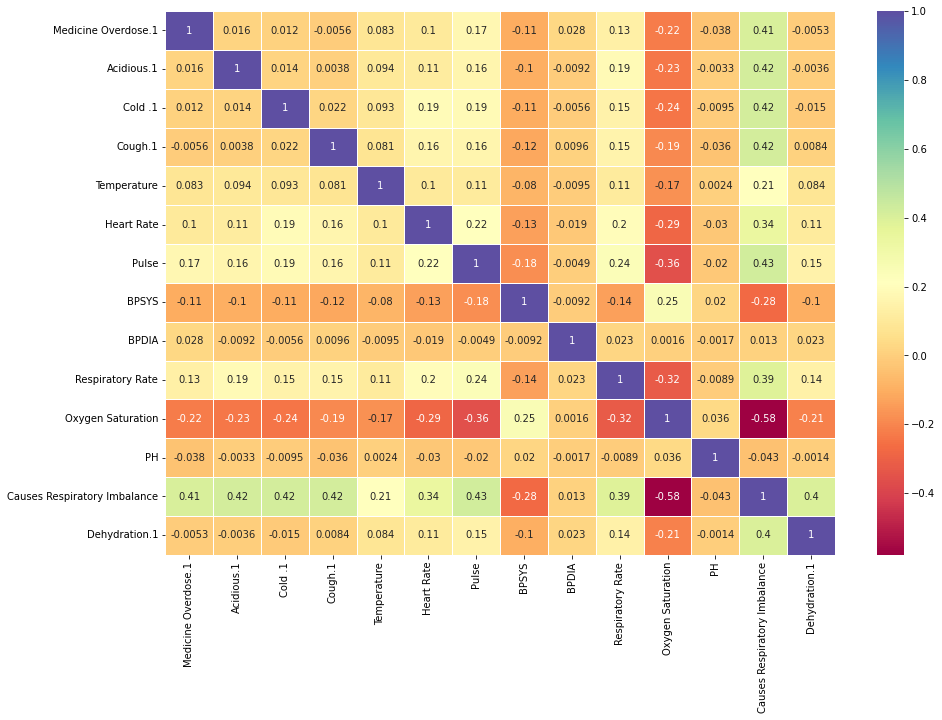

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="Spectral", annot= True, linewidth=0.5);

In [16]:
"""### Converting our data discreate value to 0 to 1
cols_to_scale = ['Temperature','Heart Rate','Pulse','BPSYS','BPDIA','Respiratory Rate','PH']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])"""

"### Converting our data discreate value to 0 to 1\ncols_to_scale = ['Temperature','Heart Rate','Pulse','BPSYS','BPDIA','Respiratory Rate','PH']\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ndf[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])"

In [17]:
df.sample(5)

,Medicine Overdose.1,Acidious.1,Cold .1,Cough.1,Temperature,Heart Rate,Pulse,BPSYS,BPDIA,Respiratory Rate,Oxygen Saturation,PH,Causes Respiratory Imbalance,Dehydration.1
1980,1,1,1,1,100,116,68,106,81,11,0.913696,1,3,1
1565,0,1,1,0,104,100,72,99,44,49,0.903836,7,3,1
1716,1,1,1,0,95,191,72,102,72,56,0.913495,13,3,1
3965,1,0,1,0,101,151,85,104,75,40,0.957156,7,3,1
848,0,0,1,1,96,199,63,100,79,36,0.902368,9,3,1


In [18]:
## Checking our dataset
df['Causes Respiratory Imbalance'].value_counts()

3    2163
2    1328
1     664
0     131
Name: Causes Respiratory Imbalance, dtype: int64

In [19]:
### You can see our dataset is imbalanced so we balanced with different techniques
## We will use SMOTE technique to balanced our dataset
# For that first we split our dataset into x and y (Features and Targets)

X = df.drop('Causes Respiratory Imbalance',axis='columns')
y = df['Causes Respiratory Imbalance']

In [20]:
"""from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()"""

"from imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(sampling_strategy='minority')\nX_sm, y_sm = smote.fit_resample(X, y)\n\ny_sm.value_counts()"

In [21]:
X.shape

(4286, 13)

In [22]:
y = keras.utils.to_categorical(y)

In [23]:
y.shape

(4286, 4)

In [24]:
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

### Splitting Data

In [25]:
### Here we spliting our dataset into train and test parts

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [26]:
print(y_train.shape)
print(y_test.shape)

(3428, 4)
(858, 4)


### Modelling

### Decision Tree Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [28]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [29]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [30]:
y_preds = dec_tree.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_preds)
print("Test Accuracy of Decision Tree is: {}".format(accuracy))

Test Accuracy of Decision Tree is: 1.0


In [32]:
scores = cross_val_score(dec_tree, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.9683994528043776


In [33]:
### Classification report 
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       435

   micro avg       1.00      1.00      1.00       858
   macro avg       1.00      1.00      1.00       858
weighted avg       1.00      1.00      1.00       858
 samples avg       1.00      1.00      1.00       858



### K Nearest Neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_preds = knn.predict(X_test)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
accuracy = accuracy_score(y_test, y_preds)
print("Test Accuracy of KNN is: {}".format(accuracy))

Test Accuracy of SVM is: 0.5815850815850816


In [39]:
scores = cross_val_score(knn, X_test, y_test, cv=4)
print("Cross-Validation Accuracy Scores", scores.mean())

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

Cross-Validation Accuracy Scores 0.558259074114323


In [40]:
### Classification report 
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.17      0.04      0.07        24
           1       0.80      0.95      0.87       124
           2       0.39      0.29      0.33       275
           3       0.61      0.69      0.65       435

   micro avg       0.59      0.58      0.59       858
   macro avg       0.49      0.49      0.48       858
weighted avg       0.56      0.58      0.56       858
 samples avg       0.58      0.58      0.58       858



c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machine Algorithm

In [41]:
from sklearn.svm import SVC

In [42]:
svc_model = SVC(random_state = 5)

In [43]:
y_train_1d = df['Causes Respiratory Imbalance'][:3428]
y_test_1d = df['Causes Respiratory Imbalance'][3428:]

In [44]:
svc_model.fit(X_train, y_train_1d)

SVC(random_state=5)

In [45]:
y_preds = svc_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test_1d, y_preds)
print("Test Accuracy of SVM is: {}".format(accuracy))

Test Accuracy of SVM is: 0.4965034965034965


In [47]:
scores = cross_val_score(svc_model, X_test, y_test_1d, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.4964979480164159


In [48]:
### Classification report 
print("Classification Report: \n", classification_report(y_test_1d, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00       134
           2       0.00      0.00      0.00       270
           3       0.50      1.00      0.66       426

    accuracy                           0.50       858
   macro avg       0.12      0.25      0.17       858
weighted avg       0.25      0.50      0.33       858



c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Random Forest Algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest = RandomForestClassifier(random_state=5)

In [51]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [52]:
y_preds = random_forest.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_preds)
print("Test Accuracy of Random Forest is: {}".format(accuracy))

Test Accuracy of Random Forest is: 0.9988344988344988


In [54]:
scores = cross_val_score(random_forest, X_test, y_test, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.9638850889192886


In [55]:
### Classification report 
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       435

   micro avg       1.00      1.00      1.00       858
   macro avg       1.00      1.00      1.00       858
weighted avg       1.00      1.00      1.00       858
 samples avg       1.00      1.00      1.00       858



### Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb = GaussianNB()

In [58]:
gnb.fit(X_train, y_train_1d)

GaussianNB()

In [59]:
y_preds = gnb.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test_1d, y_preds)
print("Test Accuracy of Naive Bayes is: {}".format(accuracy))

Test Accuracy of Naive Bayes is: 0.48717948717948717


In [61]:
scores = cross_val_score(gnb, X_test, y_test_1d, cv=10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.48834473324213407


In [62]:
### Classification report 
print("Classification Report: \n", classification_report(y_test_1d, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00       134
           2       0.26      0.02      0.04       270
           3       0.49      0.97      0.65       426

    accuracy                           0.49       858
   macro avg       0.19      0.25      0.17       858
weighted avg       0.33      0.49      0.34       858



c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Using Artficial Neural Network

In [63]:
## Making ANN function for training our model
def ANN(X_train, y_train, X_test, y_test, loss):
    global model,history
    model = keras.Sequential([
        keras.layers.Dense(13, input_dim=13, activation='relu'),
        keras.layers.Dense(150, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    history=model.fit(X_train, y_train, epochs=30)
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    return y_preds

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'categorical_crossentropy')

Epoch 1/30
108/108 [==============================] - 2s 4ms/step - loss: 1.4823 - accuracy: 0.5035
Epoch 2/30
108/108 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.5971
Epoch 3/30
108/108 [==============================] - 0s 4ms/step - loss: 0.8239 - accuracy: 0.5884
Epoch 4/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7693 - accuracy: 0.6164
Epoch 5/30
108/108 [==============================] - 1s 5ms/step - loss: 0.8022 - accuracy: 0.5957
Epoch 6/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7936 - accuracy: 0.5957
Epoch 7/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7311 - accuracy: 0.6284
Epoch 8/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7965 - accuracy: 0.5928
Epoch 9/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7361 - accuracy: 0.6085
Epoch 10/30
108/108 [==============================] - 1s 5ms/step - loss: 0.6913 - accuracy: 0.6523

In [65]:
print(model.evaluate(X_test, y_test))

27/27 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9907
[0.0994846373796463, 0.9906759858131409]


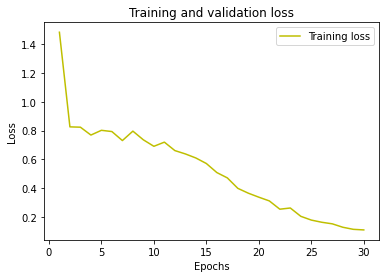

In [66]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
#valloss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [67]:
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      0.98      0.97       124
           2       0.99      0.98      0.98       275
           3       1.00      1.00      1.00       435

   micro avg       0.99      0.99      0.99       858
   macro avg       0.99      0.98      0.98       858
weighted avg       0.99      0.99      0.99       858
 samples avg       0.99      0.99      0.99       858



c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### End